In [1]:
import moviepy
import numpy
import PIL

In [5]:
import random

# Set the random seed for reproducibility
random.seed(42)

# If using NumPy (optional)
import numpy as np
np.random.seed(42)

In [2]:
from moviepy import VideoFileClip
import numpy as np
from PIL import Image

def extract_frame(video_path, timestamp):
    """
    Extracts a single frame from the video at the specified timestamp.

    Parameters:
    - video_path (str): Path to the video file.
    - timestamp (float): Time in seconds where the frame is to be extracted.

    Returns:
    - PIL.Image: The extracted frame as a PIL Image.
    """
    # Load the video file
    video = VideoFileClip(video_path)
    
    # Ensure the timestamp is within the video's duration
    if timestamp < 0 or timestamp > video.duration:
        raise ValueError(f"Timestamp {timestamp} is out of bounds. Video duration is {video.duration} seconds.")
    
    # Get the frame at the specified timestamp
    frame = video.get_frame(timestamp)
    
    # Convert the frame (which is a NumPy array) to a PIL Image
    pil_image = Image.fromarray(np.uint8(frame))
    
    return pil_image

# Example usage:
video_path = '/home/marethu/CS698_CV/Final_Project/full_videos/9CGGh6ivg68_full_video.mp4'
timestamp = 10.5  # Time in seconds
frame_image = extract_frame(video_path, timestamp)
frame_image.show()  # Display the extracted frame


{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.1.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 1121, 'fps': 30.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.3.100 libx264'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 127, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 284.7, 'bitrate': 1258, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1920, 1080], 'video_bitrate': 1121, 'video_fps': 30.0

# Getting a single clip embedding

In [4]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import numpy as np

# Load the CLIP model and processor
clip_model = CLIPModel.from_pretrained("laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K")
clip_processor = CLIPProcessor.from_pretrained("laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K")



# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

config.json:   0%|          | 0.00/4.41k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

In [7]:
# Function to generate CLIP embeddings for the frames and texts
def generate_clip_embeddings(frame_text_pairs):
    """
    Generates CLIP embeddings for a list of frame-text pairs.
    Parameters:
    - frame_text_pairs (list of dicts): Each dict contains a frame and associated text.
    Returns:
    - List of dictionaries: Each contains the embeddings for both the image and text.
    """
    embeddings = []
    
    for pair in frame_text_pairs:
        image = pair['frame']
        text = pair['text']
        
        # Process the image and text through the CLIP processor
        inputs = clip_processor(text=[text], images=image, return_tensors="pt", padding=True)
        
        # Get the model's predictions
        with torch.no_grad():
            outputs = clip_model(**inputs)
        
        # Extract the embeddings
        image_features = outputs.image_embeds
        text_features = outputs.text_embeds
        
        # Store the embeddings for both image and text
        embeddings.append({'image_features': image_features, 'text_features': text_features, 'text': text})
    
    return embeddings

In [ ]:
# Example usage:
video_path = '/home/marethu/CS698_CV/Final_Project/full_videos/9CGGh6ivg68_full_video.mp4'
timestamp = 10.5  # Time in seconds
frame_image = extract_frame(video_path, timestamp)
frame_image.show()  # Display the extracted frame

In [8]:
test_frame_text = {'frame' : frame_image, 'text' : 'this is the professor sitting in his chair'}

In [9]:
generate_clip_embeddings([test_frame_text])

[{'image_features': tensor([[-1.6382e-02, -1.6642e-02, -1.4411e-03,  3.5169e-04, -3.6261e-02,
            4.7152e-02, -6.4825e-03, -5.9166e-02,  2.0096e-02, -2.8815e-02,
           -2.0569e-02, -1.2871e-02, -4.2604e-03, -3.8404e-02,  2.6593e-02,
           -5.4868e-02, -6.1269e-02,  1.4088e-02, -1.4216e-02, -2.4745e-02,
           -5.0939e-03, -1.1903e-02, -1.0275e-03,  8.1078e-03,  6.6060e-03,
           -1.5534e-02,  1.8887e-02,  4.5226e-02, -3.0657e-03,  1.5976e-02,
           -1.3217e-02,  6.6308e-02,  9.7650e-03,  1.2951e-02,  2.6634e-02,
           -2.4621e-02, -9.0939e-03,  1.9213e-02, -2.9322e-03,  1.8158e-02,
           -1.3752e-02,  2.9127e-02, -7.5794e-03,  8.4433e-03, -4.1455e-03,
           -6.7959e-02,  3.6321e-02, -3.6809e-02,  2.7031e-02,  1.7504e-02,
           -7.1163e-03, -2.4268e-02, -5.3386e-02,  6.5081e-02, -2.7725e-03,
            5.6997e-03, -5.5897e-03,  4.4415e-02,  3.7248e-02,  1.5258e-02,
            2.7791e-02, -6.2546e-02,  1.6876e-02,  4.3498e-02, -5.5300

# Get Multiple Clip embeddings at once

In [10]:
# Function to extract random frames from the video and pair with random text
def extract_random_frames(video_path, num_frames=5, time_lower_bound=0, time_upper_bound=None):
    """
    Extracts random frames from a video within a specific time range and associates them with random text.
    Parameters:
    - video_path (str): Path to the video file.
    - num_frames (int): Number of frames to extract.
    - time_lower_bound (float): Lower bound of the time range (in seconds).
    - time_upper_bound (float): Upper bound of the time range (in seconds). If None, defaults to video duration.
    Returns:
    - List of dictionaries: Each dictionary contains a frame (PIL Image) and random text.
    """
    # Load the video file
    video = VideoFileClip(video_path)
    
    # Get the video duration
    video_duration = video.duration
    
    # Set the upper bound to video duration if it's not provided
    if time_upper_bound is None:
        time_upper_bound = video_duration
    
    # Ensure the time bounds are valid
    if time_lower_bound < 0 or time_upper_bound > video_duration or time_lower_bound >= time_upper_bound:
        raise ValueError(f"Invalid time bounds: {time_lower_bound} to {time_upper_bound}. Must be within [0, {video_duration}] and lower < upper.")
    
    # List to store frame-text pairs
    frames_texts = []
    
    # Randomly select timestamps within the time bounds and extract frames, along with random text
    for _ in range(num_frames):
        # Random timestamp within the given bounds
        timestamp = random.uniform(time_lower_bound, time_upper_bound)
        
        # Extract frame at the timestamp
        frame = extract_frame(video_path, timestamp)
        
        # Generate random text
        random_texts = [
            "This is a test string.",
            "Random sentence for testing.",
            "Generating sample text for experimentation.",
            "This is a random description.",
            "Testing with some text."
        ]
        text = random.choice(random_texts)
        
        # Add frame and text pair to the list
        frames_texts.append({'frame': frame, 'text': text})
    
    return frames_texts

In [11]:
# Example usage
video_path = '/home/marethu/CS698_CV/Final_Project/full_videos/9CGGh6ivg68_full_video.mp4'
frame_text_pairs = extract_random_frames(video_path, num_frames=5, time_lower_bound=10, time_upper_bound=50)  # Extract 3 random frames within time range (10 to 30 seconds)

# Generate CLIP embeddings for the frame-text pairs
clip_embeddings = generate_clip_embeddings(frame_text_pairs)

# Display the embeddings and associated text
for i, embedding in enumerate(clip_embeddings):
    print(f"Pair {i+1}:")
    print(f"Text: {embedding['text']}")
    print(f"Image Features: {embedding['image_features']}")
    print(f"Text Features: {embedding['text_features']}\n")

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.1.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 1121, 'fps': 30.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.3.100 libx264'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 127, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 284.7, 'bitrate': 1258, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1920, 1080], 'video_bitrate': 1121, 'video_fps': 30.0

Inter-Pair Similarity (input a pair, similarity between pair's own image and pair's own text)

In [12]:
import torch
import torch.nn.functional as F

# Function to compute cosine similarity between image and text embeddings
def compute_cosine_similarity(image_embeddings, text_embeddings):
    """
    Compute cosine similarity between image and text embeddings.
    
    Parameters:
    - image_embeddings (torch.Tensor): Embeddings for the image.
    - text_embeddings (torch.Tensor): Embeddings for the text.
    
    Returns:
    - similarity (float): Cosine similarity between the embeddings.
    """
    similarity = F.cosine_similarity(image_embeddings, text_embeddings)
    return similarity.item()

# Example usage
clip_embeddings = generate_clip_embeddings(frame_text_pairs)  # Assuming you have already generated embeddings

# Compare each image-text pair
for i, embedding in enumerate(clip_embeddings):
    image_features = embedding['image_features']
    text_features = embedding['text_features']
    
    # Compute cosine similarity
    similarity = compute_cosine_similarity(image_features, text_features)
    
    print(f"Pair {i+1} Similarity: {similarity}")


Pair 1 Similarity: 0.0518949031829834
Pair 2 Similarity: 0.05063430592417717
Pair 3 Similarity: 0.09003714472055435
Pair 4 Similarity: 0.09905355423688889
Pair 5 Similarity: 0.058405570685863495


# Image to Image similarity

In [13]:
import torch
import torch.nn.functional as F

# Function to compute cosine similarity between image embeddings
def compute_cosine_similarity(image_embeddings_1, image_embeddings_2):
    """
    Compute cosine similarity between two image embeddings.
    
    Parameters:
    - image_embeddings_1 (torch.Tensor): Embedding for the first image.
    - image_embeddings_2 (torch.Tensor): Embedding for the second image.
    
    Returns:
    - similarity (float): Cosine similarity between the image embeddings.
    """
    similarity = F.cosine_similarity(image_embeddings_1, image_embeddings_2)
    return similarity.item()

# Example usage
clip_embeddings = generate_clip_embeddings(frame_text_pairs)  # Assuming you have already generated embeddings

# Compare image-to-image similarity across pairs
for i in range(len(clip_embeddings)):
    image_features_1 = clip_embeddings[i]['image_features']
    
    for j in range(i + 1, len(clip_embeddings)):  # Start from i + 1 to avoid self-comparison
        image_features_2 = clip_embeddings[j]['image_features']
        
        # Compute cosine similarity
        similarity = compute_cosine_similarity(image_features_1, image_features_2)
        
        print(f"Image Pair {i+1} and {j+1} Similarity: {similarity}")


Image Pair 1 and 2 Similarity: 0.9924357533454895
Image Pair 1 and 3 Similarity: 0.34626635909080505
Image Pair 1 and 4 Similarity: 0.9765096306800842
Image Pair 1 and 5 Similarity: 0.3409237861633301
Image Pair 2 and 3 Similarity: 0.34717056155204773
Image Pair 2 and 4 Similarity: 0.9764388203620911
Image Pair 2 and 5 Similarity: 0.3430944085121155
Image Pair 3 and 4 Similarity: 0.3944122791290283
Image Pair 3 and 5 Similarity: 0.9318392276763916
Image Pair 4 and 5 Similarity: 0.3939981758594513


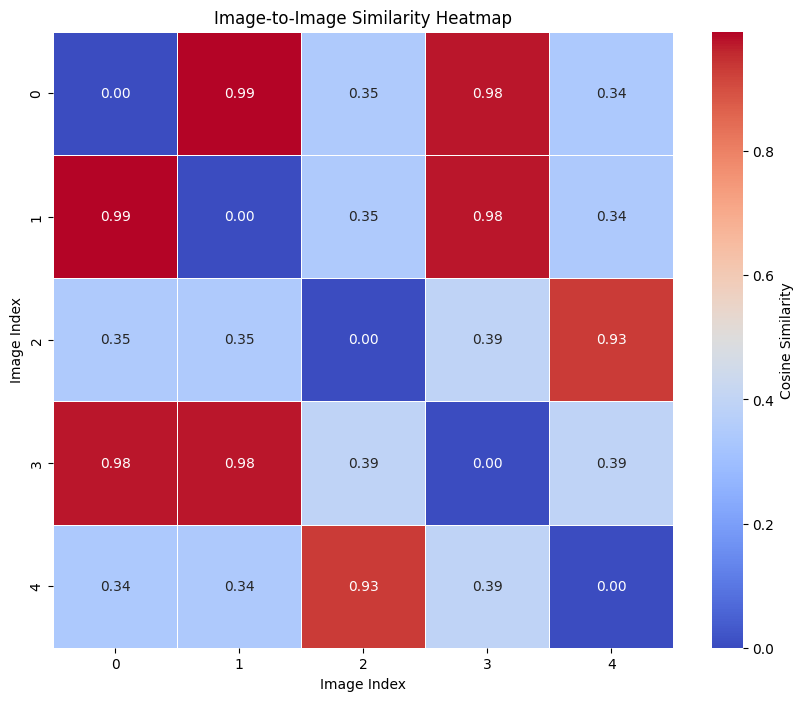

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute cosine similarity between image embeddings
import torch
import torch.nn.functional as F

def compute_cosine_similarity(image_embeddings_1, image_embeddings_2):
    similarity = F.cosine_similarity(image_embeddings_1, image_embeddings_2)
    return similarity.item()

# Assuming you have already generated the clip embeddings
clip_embeddings = generate_clip_embeddings(frame_text_pairs)

# Initialize a matrix to store similarity values
similarity_matrix = np.zeros((len(clip_embeddings), len(clip_embeddings)))

# Compute the similarity for all pairs
for i in range(len(clip_embeddings)):
    image_features_1 = clip_embeddings[i]['image_features']
    
    for j in range(i + 1, len(clip_embeddings)):
        image_features_2 = clip_embeddings[j]['image_features']
        
        # Compute cosine similarity
        similarity = compute_cosine_similarity(image_features_1, image_features_2)
        
        # Store the similarity in both [i, j] and [j, i] for a symmetric matrix
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity

# Generate a Seaborn heatmap from the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Cosine Similarity'})

# Set labels for the heatmap
plt.title("Image-to-Image Similarity Heatmap")
plt.xlabel("Image Index")
plt.ylabel("Image Index")

# Show the plot
plt.show()
